In [94]:
import pandas as pd
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt
import numpy as np

DBURL = "mysql+pymysql://root:@localhost:3333/workshop1"
Engine = create_engine(DBURL, echo=True)

In [ ]:
#KP1. Hires by technology

Query = text("""

SELECT T.technology as Technology, count(*) as HiresCount

FROM hires H

JOIN candidates C on C.candidate_id = H.candidate_id
JOIN technologies T on T.technology_id = C.technology_id

GROUP BY T.technology;""")

with Engine.connect() as Connection:
    Result = Connection.execute(Query)

KP1DF = pd.DataFrame(Result.fetchall(), columns=Result.keys())

KP1DF

2025-08-27 14:32:00,185 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 14:32:00,186 INFO sqlalchemy.engine.Engine 

SELECT T.technology as Technology, count(*) as HiresCount

FROM hires H

JOIN candidates C on C.candidate_id = H.candidate_id
JOIN technologies T on T.technology_id = C.technology_id

GROUP BY T.technology;
2025-08-27 14:32:00,187 INFO sqlalchemy.engine.Engine [generated in 0.00241s] {}
2025-08-27 14:32:00,249 INFO sqlalchemy.engine.Engine ROLLBACK


,Technology,HiresCount
0,Client Success,269
1,Social Media Community Management,236
2,System Administration,292
3,Game Development,519
4,Design,249
5,Adobe Experience Manager,283
6,DevOps,495
7,Security,265
8,Business Analytics / Project Management,256
9,Security Compliance,251


In [132]:
#KP2. Hires by year

Query = text("""

SELECT D.year as Year, count(*) as HiresCount

FROM hires H

JOIN dates D on D.date_id = H.date_id

GROUP BY D.year;""")

with Engine.connect() as Connection:
    Result = Connection.execute(Query)

KP2DF = pd.DataFrame(Result.fetchall(), columns=Result.keys())

KP2DF = KP2DF.sort_values(by='Year')
KP2DF

2025-08-27 16:54:57,292 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2025-08-27 16:54:57,294 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-08-27 16:54:57,298 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2025-08-27 16:54:57,299 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-08-27 16:54:57,300 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2025-08-27 16:54:57,302 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-08-27 16:54:57,306 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 16:54:57,308 INFO sqlalchemy.engine.Engine 

SELECT D.year as Year, count(*) as HiresCount

FROM hires H

JOIN dates D on D.date_id = H.date_id

GROUP BY D.year;
2025-08-27 16:54:57,309 INFO sqlalchemy.engine.Engine [generated in 0.00361s] {}
2025-08-27 16:54:57,360 INFO sqlalchemy.engine.Engine ROLLBACK


,Year,HiresCount
1,2018,1409
4,2019,1524
0,2020,1485
2,2021,1485
3,2022,795


In [ ]:
#KP3. Hires by seniority

Query = text("""

SELECT S.seniority as Seniority, count(*) as HiresCount

FROM hires H

JOIN candidates C on C.candidate_id = H.candidate_id
JOIN senioritys S on S.seniority_id = C.seniority_id

GROUP BY S.seniority;""")

with Engine.connect() as Connection:
    Result = Connection.execute(Query)

KP3DF = pd.DataFrame(Result.fetchall(), columns=Result.keys())

KP3DF

2025-08-27 14:40:17,719 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 14:40:17,721 INFO sqlalchemy.engine.Engine 

SELECT S.seniority as Seniority, count(*) as HiresCount

FROM hires H

JOIN candidates C on C.candidate_id = H.candidate_id
JOIN senioritys S on S.seniority_id = C.seniority_id

GROUP BY S.seniority;
2025-08-27 14:40:17,723 INFO sqlalchemy.engine.Engine [generated in 0.00398s] {}
2025-08-27 14:40:17,784 INFO sqlalchemy.engine.Engine ROLLBACK


,Seniority,HiresCount
0,Mid-Level,925
1,Lead,926
2,Junior,978
3,Senior,940
4,Trainee,972
5,Intern,986
6,Architect,971


In [22]:
#KPI4. Hires by country over years

Query = text("""

SELECT D.year as Year, P.country as Country, count(*) as HiresCount

FROM hires H

JOIN candidates C on C.candidate_id = H.candidate_id
JOIN countries P on P.country_id = C.country_id
JOIN dates D on D.date_id = H.date_id

WHERE P.country_id in (139, 48, 44, 56)

GROUP BY D.year, P.country;""")

with Engine.connect() as Connection:
    Result = Connection.execute(Query)

KP4DF = pd.DataFrame(Result.fetchall(), columns=Result.keys())

KP4DF

2025-08-27 14:55:42,215 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 14:55:42,217 INFO sqlalchemy.engine.Engine 

SELECT D.year as Year, P.country as Country, count(*) as HiresCount

FROM hires H

JOIN candidates C on C.candidate_id = H.candidate_id
JOIN countries P on P.country_id = C.country_id
JOIN dates D on D.date_id = H.date_id

WHERE P.country_id in (139, 48, 44, 56)

GROUP BY D.year, P.country;
2025-08-27 14:55:42,218 INFO sqlalchemy.engine.Engine [generated in 0.00311s] {}
2025-08-27 14:55:42,226 INFO sqlalchemy.engine.Engine ROLLBACK


,Year,Country,HiresCount
0,2018,Brazil,9
1,2019,Brazil,7
2,2020,Brazil,6
3,2022,Brazil,4
4,2021,Brazil,7
5,2018,Colombia,7
6,2019,Colombia,8
7,2020,Colombia,8
8,2022,Colombia,1
9,2021,Colombia,1


Los mios: Puntajes promedio, paises con mas contrataciones, nombres mas comunes y contrataciones por yoe

In [29]:
#KPI5. Hires by years of experience

Query = text("""

SELECT C.yoe as YearsOfExperience, count(*) as HiresCount

FROM hires H

JOIN candidates C on C.candidate_id = H.candidate_id

GROUP BY C.yoe;""")

with Engine.connect() as Connection:
    Result = Connection.execute(Query)

KP5DF = pd.DataFrame(Result.fetchall(), columns=Result.keys())

KP5DF

2025-08-27 15:20:55,474 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 15:20:55,475 INFO sqlalchemy.engine.Engine 

SELECT C.yoe as YearsOfExperience, count(*) as HiresCount

FROM hires H

JOIN candidates C on C.candidate_id = H.candidate_id

GROUP BY C.yoe;
2025-08-27 15:20:55,476 INFO sqlalchemy.engine.Engine [cached since 1132s ago] {}
2025-08-27 15:20:55,497 INFO sqlalchemy.engine.Engine ROLLBACK


,YearsOfExperience,HiresCount
0,4,221
1,13,209
2,18,241
3,16,213
4,14,219
5,5,232
6,9,211
7,11,232
8,30,231
9,19,225


In [26]:
#KPI6. Average scores

Query = text("""

SELECT avg(code_challenge_score) as CodingAvg, avg(technical_interview_score) as TechnicalAvg
FROM Hires;""")

with Engine.connect() as Connection:
    Result = Connection.execute(Query)

KP6DF = pd.DataFrame(Result.fetchall(), columns=Result.keys())

KP6DF

2025-08-27 15:10:33,017 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 15:10:33,019 INFO sqlalchemy.engine.Engine 

SELECT avg(code_challenge_score) as CodingAvg, avg(technical_interview_score) as TechnicalAvg
FROM Hires;
2025-08-27 15:10:33,021 INFO sqlalchemy.engine.Engine [generated in 0.00404s] {}
2025-08-27 15:10:33,029 INFO sqlalchemy.engine.Engine ROLLBACK


,CodingAvg,TechnicalAvg
0,8.5000,8.4792


In [27]:
#KPI7. Hires by country

Query = text("""

SELECT P.country as Country, count(*) as HiresCount

FROM hires H

JOIN candidates C on C.candidate_id = H.candidate_id
JOIN countries P on P.country_id = C.country_id

GROUP BY  P.country;""")

with Engine.connect() as Connection:
    Result = Connection.execute(Query)

KP7DF = pd.DataFrame(Result.fetchall(), columns=Result.keys())

KP7DF


2025-08-27 15:13:08,020 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 15:13:08,023 INFO sqlalchemy.engine.Engine 

SELECT P.country as Country, count(*) as HiresCount

FROM hires H

JOIN candidates C on C.candidate_id = H.candidate_id
JOIN countries P on P.country_id = C.country_id

GROUP BY  P.country;
2025-08-27 15:13:08,025 INFO sqlalchemy.engine.Engine [generated in 0.00445s] {}
2025-08-27 15:13:08,067 INFO sqlalchemy.engine.Engine ROLLBACK


,Country,HiresCount
0,Belarus,29
1,Myanmar,23
2,Italy,29
3,El Salvador,24
4,Dominica,31
...,...,...
239,Cape Verde,22
240,Uruguay,29
241,France,31
242,Palestinian Territory,23


In [28]:
#KPI8. Hires by first name

Query = text("""

SELECT C.first_name as FirstName, count(*) as Frecuency

FROM hires H

JOIN candidates C on C.candidate_id = H.candidate_id

GROUP BY C.first_name;""")

with Engine.connect() as Connection:
    Result = Connection.execute(Query)

KP8DF = pd.DataFrame(Result.fetchall(), columns=Result.keys())

KP8DF


2025-08-27 15:19:14,295 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-27 15:19:14,297 INFO sqlalchemy.engine.Engine 

SELECT C.first_name as FirstName, count(*) as Frecuency

FROM hires H

JOIN candidates C on C.candidate_id = H.candidate_id

GROUP BY C.first_name;
2025-08-27 15:19:14,299 INFO sqlalchemy.engine.Engine [generated in 0.00368s] {}
2025-08-27 15:19:14,339 INFO sqlalchemy.engine.Engine ROLLBACK


,FirstName,Frecuency
0,Larue,3
1,Mose,1
2,Hilda,2
3,Crawford,1
4,Dorian,1
...,...,...
2662,Naomie,1
2663,Samson,1
2664,Johnpaul,1
2665,Odell,1


Hires by technology

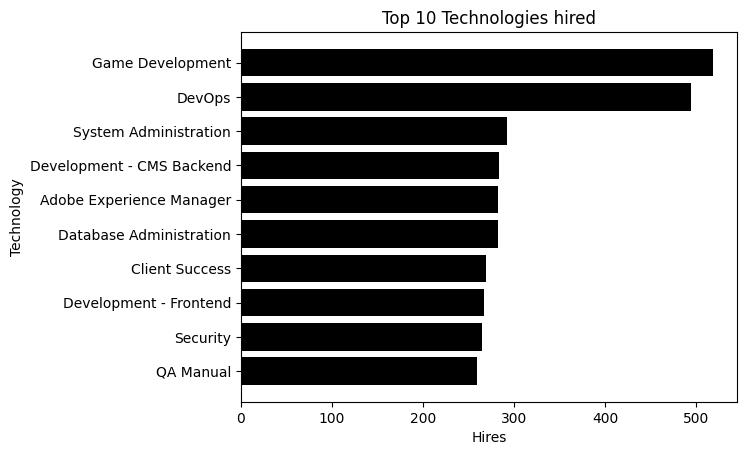

In [ ]:
SortedDf = KP1DF.sort_values(by='HiresCount')
SortedDf = SortedDf.iloc[-10:] #Top 10, hay muchas categorias

plt.barh(SortedDf['Technology'], SortedDf['HiresCount'], color='black')

plt.title('Top 10 Technologies hired')
plt.xlabel('Hires')
plt.ylabel('Technology')


plt.show()

Hires by year

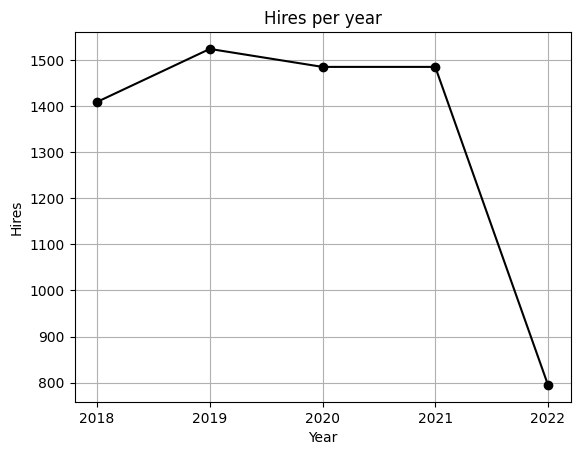

In [78]:
plt.plot(KP2DF['Year'], KP2DF['HiresCount'], marker='o', color='black', linestyle='-')
plt.xticks(range(KP2DF['Year'].values[0], KP2DF['Year'].values[-1] + 1 , 1)) #Xticks automaticos no quedan bien

plt.title('Hires per year')
plt.xlabel('Year')
plt.ylabel('Hires')


plt.grid(True)
plt.show()

Hires by seniority

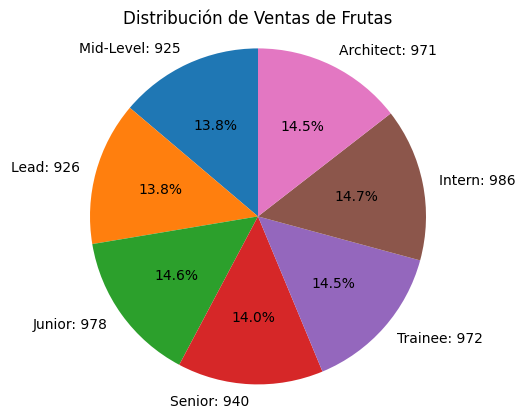

In [82]:
#plt.pie(KP3DF['HiresCount'], labels=KP3DF['Seniority'], autopct='%1.1f%%', startangle=90)
plt.pie(KP3DF['HiresCount'], labels=[f'{Name}: {Value}' for Name, Value in zip(KP3DF['Seniority'], KP3DF['HiresCount'])], autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Distribución de Ventas de Frutas')

plt.show()

Hires per year (USA, Brazil, Colombia & Ecuador)

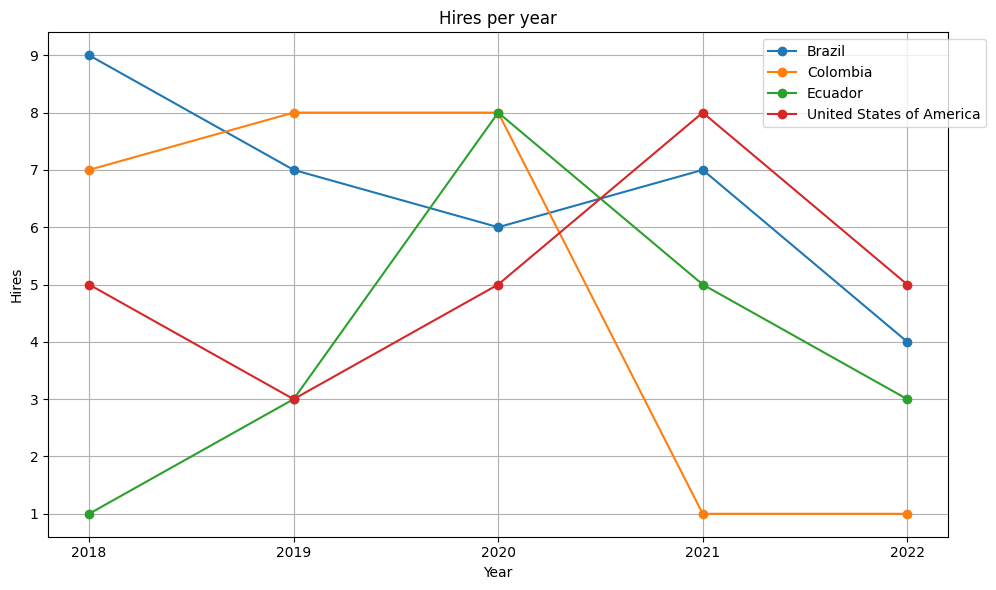

In [105]:
plt.figure(figsize=(10, 6))

for Country in KP4DF['Country'].unique():
    Df = KP4DF.loc[KP4DF['Country'] == Country].sort_values(by='Year')
    plt.plot(Df['Year'], Df['HiresCount'], marker='o', linestyle='-', label=Country)

plt.xticks(range(np.sort(KP4DF['Year'].unique())[0], np.sort(KP4DF['Year'].unique())[-1] + 1 , 1)) #Xticks automaticos no quedan bien

plt.title('Hires per year')
plt.xlabel('Year')
plt.ylabel('Hires')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.tight_layout() 
plt.grid(True)
plt.show()

Hires by YOE

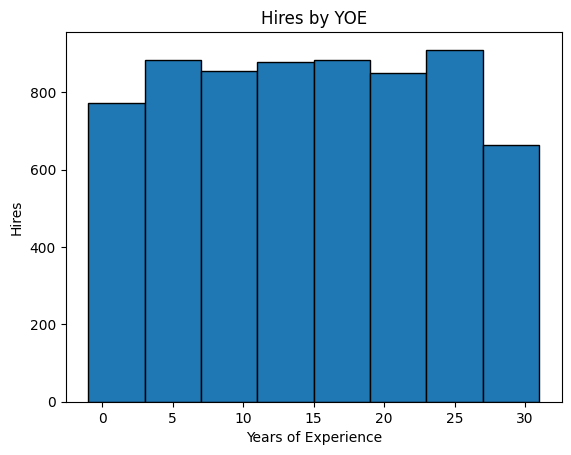

In [133]:
SortedDf = KP5DF.sort_values(by='YearsOfExperience')

BinsSize = 4
Bins = list(range(1, 31, BinsSize))
BinsFrecuencies = [sum(SortedDf['HiresCount'].values[i:i+BinsSize]) for i in range(0, len(SortedDf['HiresCount'].values), BinsSize)]

plt.bar(Bins, BinsFrecuencies, width=4, align='center', edgecolor='black')
plt.xlabel('Years of Experience')
plt.ylabel('Hires')
plt.title('Hires by YOE')

# Mostrar
plt.show()

Tests average scores

In [ ]:
KP6DF

,CodingAvg,TechnicalAvg
0,8.5000,8.4792


Hires per Country

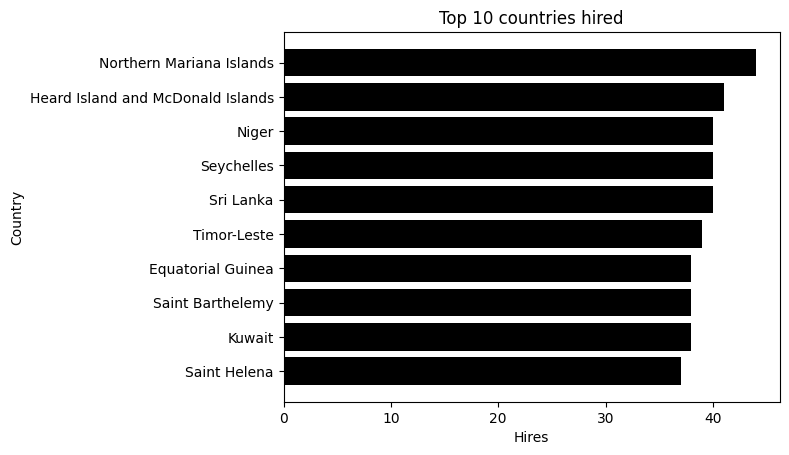

In [110]:
SortedDf = KP7DF.sort_values(by='HiresCount')
SortedDf = SortedDf.iloc[-10:] #Top 10, hay muchas categorias

plt.barh(SortedDf['Country'], SortedDf['HiresCount'], color='black')

plt.title('Top 10 countries hired')
plt.xlabel('Hires')
plt.ylabel('Country')


plt.show()

Most common names lol

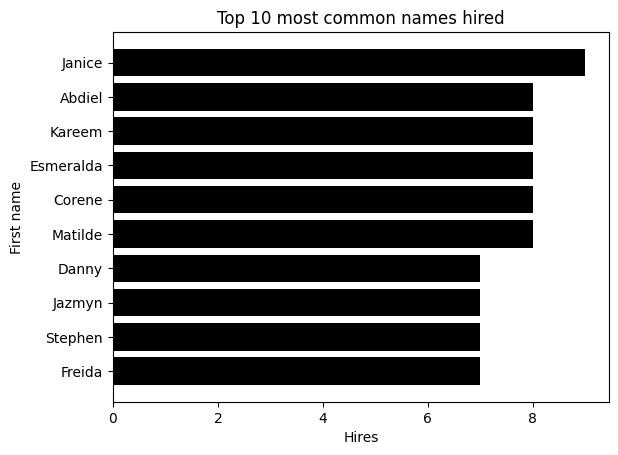

In [112]:
SortedDf = KP8DF.sort_values(by='Frecuency')
SortedDf = SortedDf.iloc[-10:] #Top 10, hay muchas categorias

plt.barh(SortedDf['FirstName'], SortedDf['Frecuency'], color='black')

plt.title('Top 10 most common names hired')
plt.xlabel('Hires')
plt.ylabel('First name')


plt.show()